# 44688-Data Analytics Capstone Project

## FDIP (Fire Department Incident Prediction)

##### 03/13/23 - 04/28/23

##### Debra D. "DeeDee" Walker

##### Northwest Missouri State University, Maryville MO 64468, USA

In [1]:
#Import the pandas framework to import and work with the dataset
import pandas as pd

#Set pandas to show all rows and not truncate
pd.set_option('display.max_rows', None)

#Import datetime so we can work with dates and times
import datetime as dt

#Import numpy
import numpy as np

#Data is accessed through the csv file download due to the limitations of the API on the site for this large dataset. The API endpoint limits hits and requires data to be requested by page
# Data was pulled from https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd on March 16, 2023
#Use the function read_csv from pandas and create a dataframe assigned to variable df
df = pd.read_csv('Incidents_Responded_to_by_Fire_Companies.csv', sep=',', dtype={"IM_INCIDENT_KEY": str, "FIRE_BOX": str, "INCIDENT_TYPE_DESC": str, "INCIDENT_DATE_TIME": object, 
                                                                                 "ARRIVAL_DATE_TIME": object, "UNITS_ONSCENE": float, "LAST_UNIT_CLEARED_DATE_TIME": object, "HIGHEST_LEVEL_DESC": str,
                                                                                "TOTAL_INCIDENT_DURATION": float, "ACTION_TAKEN1_DESC": str, "ACTION_TAKEN2_DESC": str, "ACTION_TAKEN3_DESC": str,
                                                                                "PROPERTY_USE_DESC": str, "STREET_HIGHWAY": str, "ZIP_CODE": str, "BOROUGH_DESC": str, "FLOOR": str, 
                                                                                 "CO_DETECTOR_PRESENT_DESC": str, "FIRE_ORIGIN_BELOW_GRADE_FLAG": str, "STORY_FIRE_ORIGIN_COUNT": str,
                                                                                "FIRE_SPREAD_DESC": str, "DETECTOR_PRESENCE_DESC": str, "AES_PRESENCE_DESC": str, "STANDPIPE_SYS_PRESENT_FLAG": str})

In [2]:
#Remove columns/features that we aren't using to reduce the size of the file or project concentration
df.drop(['FIRE_BOX', 'ARRIVAL_DATE_TIME', 'LAST_UNIT_CLEARED_DATE_TIME', 'STREET_HIGHWAY', 'FLOOR', 'CO_DETECTOR_PRESENT_DESC', 'FIRE_ORIGIN_BELOW_GRADE_FLAG',
                'STORY_FIRE_ORIGIN_COUNT', 'FIRE_SPREAD_DESC', 'DETECTOR_PRESENCE_DESC', 'AES_PRESENCE_DESC', 'STANDPIPE_SYS_PRESENT_FLAG', 'ACTION_TAKEN2_DESC',
                'ACTION_TAKEN3_DESC'], axis=1, inplace=True)

In [3]:
#convert INCIDENT_DATE_TIME from object to datetime format then print min & max
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'], infer_datetime_format = True)
print (df['INCIDENT_DATE_TIME'].min())
print (df['INCIDENT_DATE_TIME'].max())

2013-01-01 00:00:20
2021-12-31 23:59:24


In [4]:
#filter by year only selecting 2017 - 2022 then print min & max to verify
df = df[(df['INCIDENT_DATE_TIME']).dt.year.isin([2017,2018,2019,2020,2021])]
print (df['INCIDENT_DATE_TIME'].min())
print (df['INCIDENT_DATE_TIME'].max())

2017-01-01 00:00:22
2021-12-31 23:59:24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348968 entries, 2556 to 4158391
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   IM_INCIDENT_KEY          object        
 1   INCIDENT_TYPE_DESC       object        
 2   INCIDENT_DATE_TIME       datetime64[ns]
 3   UNITS_ONSCENE            float64       
 4   HIGHEST_LEVEL_DESC       object        
 5   TOTAL_INCIDENT_DURATION  float64       
 6   ACTION_TAKEN1_DESC       object        
 7   PROPERTY_USE_DESC        object        
 8   ZIP_CODE                 object        
 9   BOROUGH_DESC             object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 197.1+ MB


In [6]:
#the file is large enough that info() doesn't report the null values so we have to force it.
#This is for record 1 through 1,599,999
df.iloc[:1600000].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 2556 to 3409423
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   IM_INCIDENT_KEY          1600000 non-null  object        
 1   INCIDENT_TYPE_DESC       1600000 non-null  object        
 2   INCIDENT_DATE_TIME       1600000 non-null  datetime64[ns]
 3   UNITS_ONSCENE            1551650 non-null  float64       
 4   HIGHEST_LEVEL_DESC       1599927 non-null  object        
 5   TOTAL_INCIDENT_DURATION  1599929 non-null  float64       
 6   ACTION_TAKEN1_DESC       1600000 non-null  object        
 7   PROPERTY_USE_DESC        1600000 non-null  object        
 8   ZIP_CODE                 1599990 non-null  object        
 9   BOROUGH_DESC             1600000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 134.3+ MB


In [7]:
#the file is large enough that info() doesn't report the null values so we have to force it.
#This is for record 1,600,000 through 2,348,968
df.iloc[1600000:2348969].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748968 entries, 3409424 to 4158391
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   IM_INCIDENT_KEY          748968 non-null  object        
 1   INCIDENT_TYPE_DESC       748968 non-null  object        
 2   INCIDENT_DATE_TIME       748968 non-null  datetime64[ns]
 3   UNITS_ONSCENE            726885 non-null  float64       
 4   HIGHEST_LEVEL_DESC       748935 non-null  object        
 5   TOTAL_INCIDENT_DURATION  748417 non-null  float64       
 6   ACTION_TAKEN1_DESC       748968 non-null  object        
 7   PROPERTY_USE_DESC        748968 non-null  object        
 8   ZIP_CODE                 748966 non-null  object        
 9   BOROUGH_DESC             748968 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 62.9+ MB


In [8]:
df.describe()

,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION
count,2.278535e+06,2.348346e+06
mean,1.942324e+00,1.452199e+03
std,1.823836e+00,3.092382e+03
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.500000e+02
50%,1.000000e+00,1.054000e+03
75%,2.000000e+00,1.577000e+03
max,1.360000e+02,1.716464e+06


In [9]:
#Remove any duplicate records keeping just the first one
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df['INCIDENT_TYPE_DESC'].value_counts()

300 - Rescue, EMS incident, other                                          890327
735A - Unwarranted alarm/defective condition of alarm system               125647
651 - Smoke scare, odor of smoke                                           117934
710 - Malicious, mischievous false call, other                             112959
412 - Gas leak (natural gas or LPG)                                        101834
522 - Water or steam leak                                                   95863
353 - Removal of victim(s) from stalled elevator                            91445
113 - Cooking fire, confined to container                                   87021
555 - Defective elevator, no occupants                                      56304
736 - CO detector activation due to malfunction                             49061
322 - Motor vehicle accident with injuries                                  43689
353S - Stalled occupied elevator-removal via hoistway door                  40290
445 - Arcing, sh

In [11]:
#Based on the code assign a new category desc
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('1'), 'INCIDENT_CATEGORY'] = 'FIRE'
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('2'), 'INCIDENT_CATEGORY'] = 'OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE'
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('3'), 'INCIDENT_CATEGORY'] = 'RESCUE & EMS'
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('4'), 'INCIDENT_CATEGORY'] = 'HAZARDOUS CONDITION-NO FIRE'
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('5'), 'INCIDENT_CATEGORY'] = 'SERVICE CALL'
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('6'), 'INCIDENT_CATEGORY'] = 'CANCELED, GOOD INTENT'
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('7'), 'INCIDENT_CATEGORY'] = 'FALSE ALARM FALSE CALL'
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('8'), 'INCIDENT_CATEGORY'] = 'SEVERE WEATHER & NATURAL DISASTER'
#Based on code assign a new category number
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('1'), 'INCIDENT_CATNUM'] = 1
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('2'), 'INCIDENT_CATNUM'] = 2
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('3'), 'INCIDENT_CATNUM'] = 3
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('4'), 'INCIDENT_CATNUM'] = 4
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('5'), 'INCIDENT_CATNUM'] = 5
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('6'), 'INCIDENT_CATNUM'] = 6
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('7'), 'INCIDENT_CATNUM'] = 7
df.loc[df['INCIDENT_TYPE_DESC'].str.startswith('8'), 'INCIDENT_CATNUM'] = 8
#convert to integer
df['INCIDENT_CATNUM'] = df['INCIDENT_CATNUM'].astype(int)

In [12]:
#review value counts of new feature
df.iloc[:1600000].info(verbose=True)
df.iloc[1600000:2348969].info(verbose=True)
df['INCIDENT_CATEGORY'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 2556 to 3413901
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   IM_INCIDENT_KEY          1600000 non-null  object        
 1   INCIDENT_TYPE_DESC       1600000 non-null  object        
 2   INCIDENT_DATE_TIME       1600000 non-null  datetime64[ns]
 3   UNITS_ONSCENE            1551523 non-null  float64       
 4   HIGHEST_LEVEL_DESC       1599927 non-null  object        
 5   TOTAL_INCIDENT_DURATION  1599929 non-null  float64       
 6   ACTION_TAKEN1_DESC       1600000 non-null  object        
 7   PROPERTY_USE_DESC        1600000 non-null  object        
 8   ZIP_CODE                 1599990 non-null  object        
 9   BOROUGH_DESC             1600000 non-null  object        
 10  INCIDENT_CATEGORY        1600000 non-null  object        
 11  INCIDENT_CATNUM          1600000 non-null  int32         
dt

RESCUE & EMS                                         1156971
FALSE ALARM FALSE CALL                                384663
SERVICE CALL                                          240053
HAZARDOUS CONDITION-NO FIRE                           191581
CANCELED, GOOD INTENT                                 185976
FIRE                                                  169766
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE      11693
SEVERE WEATHER & NATURAL DISASTER                        350
Name: INCIDENT_CATEGORY, dtype: int64

In [13]:
df['HIGHEST_LEVEL_DESC'].value_counts()

11 - First Alarm                                     1845348
1 - More than initial alarm, less than Signal 7-5     479970
75 - All Hands Working                                  7055
00 - Complaint/Still                                    5315
7 - Signal 7-5                                          1973
22 - Second Alarm                                        464
0 - Initial alarm                                        433
2 - 2nd alarm                                            134
33 - Third Alarm                                         116
44 - Fourth Alarm                                         47
3 - 3rd alarm                                             36
55 - Fifth Alarm                                          19
5 - 5th alarm                                             14
4 - 4th alarm                                             14
66 - Sixth Alarm                                           4
77 - Seventh Alarm                                         3
88 - Eighth Alarm       

In [14]:
#Remove row with no data in highest level and duration
df.dropna(subset=['HIGHEST_LEVEL_DESC','TOTAL_INCIDENT_DURATION'], inplace = True)

In [15]:
#Based on the code assign a new category
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('0'), 'LEVEL_CATEGORY'] = 1
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('1'), 'LEVEL_CATEGORY'] = 1
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('2'), 'LEVEL_CATEGORY'] = 2
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('3'), 'LEVEL_CATEGORY'] = 3
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('4'), 'LEVEL_CATEGORY'] = 4
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('5'), 'LEVEL_CATEGORY'] = 5
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('6'), 'LEVEL_CATEGORY'] = 6
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('7'), 'LEVEL_CATEGORY'] = 7
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('8'), 'LEVEL_CATEGORY'] = 7
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('110'), 'LEVEL_CATEGORY'] = 7
df.loc[df['HIGHEST_LEVEL_DESC'].str.startswith('00'), 'LEVEL_CATEGORY'] = 0

In [16]:
#review value counts of new feature
df.iloc[:1600000].info(verbose=True)
df.iloc[1600000:2348969].info(verbose=True)
#convert to integer
df['LEVEL_CATEGORY'] = df['LEVEL_CATEGORY'].astype(int)
df['LEVEL_CATEGORY'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 2556 to 3413978
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   IM_INCIDENT_KEY          1600000 non-null  object        
 1   INCIDENT_TYPE_DESC       1600000 non-null  object        
 2   INCIDENT_DATE_TIME       1600000 non-null  datetime64[ns]
 3   UNITS_ONSCENE            1551592 non-null  float64       
 4   HIGHEST_LEVEL_DESC       1600000 non-null  object        
 5   TOTAL_INCIDENT_DURATION  1600000 non-null  float64       
 6   ACTION_TAKEN1_DESC       1600000 non-null  object        
 7   PROPERTY_USE_DESC        1600000 non-null  object        
 8   ZIP_CODE                 1599992 non-null  object        
 9   BOROUGH_DESC             1600000 non-null  object        
 10  INCIDENT_CATEGORY        1600000 non-null  object        
 11  INCIDENT_CATNUM          1600000 non-null  int32         
 1

1    2325249
7       9032
0       5299
2        598
3        150
4         60
5         33
6          4
Name: LEVEL_CATEGORY, dtype: int64

In [17]:
#Drop converted features 
df.drop(['HIGHEST_LEVEL_DESC'], axis=1, inplace=True)
df.drop(['INCIDENT_TYPE_DESC'], axis=1, inplace=True)

In [18]:
df['ACTION_TAKEN1_DESC'].value_counts()

00 - Action taken, other                                   1180189
86 - Investigate                                            293433
64 - Shut down system                                       168566
11 - Extinguishment by fire service personnel               138168
45 - Remove hazard                                          114543
44 - Hazardous materials leak control & containment          95228
70 - Assistance, other                                       55217
22 - Rescue, remove from harm                                43478
31 - Provide first aid & check for injuries                  41211
93 - Cancelled en route                                      33217
82 - Notify other agencies.                                  32782
48 - Remove hazardous materials                              18793
302 - Provide Patient Care                                   18377
42 - HazMat detection, monitoring, sampling, & analysis      18026
53 - Evacuate area                                           1

In [19]:
#Drop feature since the most information is coming from incident type and highest level description
df.drop(['ACTION_TAKEN1_DESC'], axis=1, inplace=True)

In [20]:
df['PROPERTY_USE_DESC'].value_counts()

UUU - Undetermined                                          1382808
429 - Multifamily dwelling                                   456571
419 - 1 or 2 family dwelling                                 106616
960 - Street, other                                           96875
962 - Residential street, road or residential driveway        94324
961 - Highway or divided highway                              43439
963 - Street or road in commercial area                       25422
400 - Residential, other                                      19837
500 - Mercantile, business, other                             18949
174 - Rapid transit station                                   11102
599 - Business office                                         10698
449 - Hotel/motel, commercial                                  5683
000 - Property Use, other                                      5659
900 - Outside or special property, other                       4638
331 - Hospital - medical or psychiatric         

In [21]:
#Drop feature due to number of undetermined values
df.drop(['PROPERTY_USE_DESC'], axis=1, inplace=True)

In [22]:
df['BOROUGH_DESC'].value_counts()

4 - Brooklyn         685614
1 - Manhattan        568009
2 - Bronx            487964
5 - Queens           475801
3 - Staten Island    123037
Name: BOROUGH_DESC, dtype: int64

In [23]:
#Assign borough num
df.loc[df['BOROUGH_DESC'].str.startswith('1'), 'BOROUGH_NUM'] = 1
df.loc[df['BOROUGH_DESC'].str.startswith('2'), 'BOROUGH_NUM'] = 2
df.loc[df['BOROUGH_DESC'].str.startswith('3'), 'BOROUGH_NUM'] = 3
df.loc[df['BOROUGH_DESC'].str.startswith('4'), 'BOROUGH_NUM'] = 4
df.loc[df['BOROUGH_DESC'].str.startswith('5'), 'BOROUGH_NUM'] = 5
#convert to integer
df['BOROUGH_NUM'] = df['BOROUGH_NUM'].astype(int)

In [24]:
df['ZIP_CODE'].value_counts()

99999    54179
10456    41690
11206    36784
11212    36702
10029    35895
11207    35035
10002    32488
10451    31391
11201    28636
10467    28511
10457    28493
10027    28449
11208    28337
10453    28156
10458    27512
11226    26959
11211    26164
11221    26043
11233    25816
10460    23816
10035    23403
10454    22703
11236    22634
10025    22547
10452    22341
10009    22056
11203    21884
10455    21773
11234    21598
11101    20679
10314    20132
11213    19970
10021    19825
11224    19805
10003    19657
10472    19254
10468    19185
11691    19113
10469    18909
10473    18791
11385    18573
10032    18524
10016    17880
10001    17781
10463    17641
11216    17548
10466    17445
11229    17392
11235    17205
10459    17196
11373    17030
10019    16980
10031    16795
10026    16592
11230    16380
11368    16350
10462    15997
11432    15862
11434    15665
11210    15466
11220    15451
11217    15425
10011    15300
11214    15165
10036    15140
11237    15123
10304    1

In [25]:
#Fill in nan for units on scene with the mean and round feature to integer
df['UNITS_ONSCENE'].replace([np.nan], df['UNITS_ONSCENE'].mean(), inplace = True)
df['UNITS_ONSCENE'] = df['UNITS_ONSCENE'].round(0).astype(int)
df.iloc[:1600000].info(verbose=True)
df.iloc[1600000:2348969].info(verbose=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 2556 to 3413978
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   IM_INCIDENT_KEY          1600000 non-null  object        
 1   INCIDENT_DATE_TIME       1600000 non-null  datetime64[ns]
 2   UNITS_ONSCENE            1600000 non-null  int32         
 3   TOTAL_INCIDENT_DURATION  1600000 non-null  float64       
 4   ZIP_CODE                 1599992 non-null  object        
 5   BOROUGH_DESC             1600000 non-null  object        
 6   INCIDENT_CATEGORY        1600000 non-null  object        
 7   INCIDENT_CATNUM          1600000 non-null  int32         
 8   LEVEL_CATEGORY           1600000 non-null  int32         
 9   BOROUGH_NUM              1600000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(4)
memory usage: 109.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64In

,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,INCIDENT_CATNUM,LEVEL_CATEGORY,BOROUGH_NUM
count,2.340425e+06,2.340425e+06,2.340425e+06,2.340425e+06,2.340425e+06
mean,1.934350e+00,1.448345e+03,4.033444e+00,1.021416e+00,3.005655e+00
std,1.752351e+00,3.061373e+03,1.751321e+00,3.764905e-01,1.511745e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,7.500000e+02,3.000000e+00,1.000000e+00,2.000000e+00
50%,1.000000e+00,1.054000e+03,3.000000e+00,1.000000e+00,3.000000e+00
75%,2.000000e+00,1.576000e+03,5.000000e+00,1.000000e+00,4.000000e+00
max,1.360000e+02,1.716464e+06,8.000000e+00,7.000000e+00,5.000000e+00


In [26]:
#assign counter/variable for while loop
b = 1

In [27]:
#99999 is not a real zipcode; Cross match to borough and impute most common zip
#Using df2, filter the borough and zip and add count values
while b < 6:
    df2 = df.groupby(['BOROUGH_DESC', 'ZIP_CODE']).size().reset_index(name='counts')
    # get the most frequent zip for a borough
    df3 = df2.loc[(df2['BOROUGH_DESC'].str.contains(str(b)))].sort_values(by='counts', ascending=False).nlargest(1,'counts')
    #assign value to variable
    x = df3.iloc[0,1]
    #Assign highest count value per borough to 99999 records
    df.loc[(df['BOROUGH_DESC'].str.startswith(str(b))) & (df['ZIP_CODE'] == '99999'),'ZIP_CODE'] = x
    b += 1

In [28]:
#verify that the 99999 is now replaced
df['ZIP_CODE'].value_counts()

10029    61219
10456    51492
11206    44643
11212    36702
11207    35035
10002    32488
10451    31391
11201    28636
10467    28511
10457    28493
10027    28449
11208    28337
10453    28156
11101    27667
10458    27512
11226    26959
11211    26164
11221    26043
11233    25816
10314    24338
10460    23816
10035    23403
10454    22703
11236    22634
10025    22547
10452    22341
10009    22056
11203    21884
10455    21773
11234    21598
11213    19970
10021    19825
11224    19805
10003    19657
10472    19254
10468    19185
11691    19113
10469    18909
10473    18791
11385    18573
10032    18524
10016    17880
10001    17781
10463    17641
11216    17548
10466    17445
11229    17392
11235    17205
10459    17196
11373    17030
10019    16980
10031    16795
10026    16592
11230    16380
11368    16350
10462    15997
11432    15862
11434    15665
11210    15466
11220    15451
11217    15425
10011    15300
11214    15165
10036    15140
11237    15123
10304    15060
11205    1

In [29]:
#Remove rows with no data
df.dropna(subset=['ZIP_CODE'], inplace = True)

In [30]:
#Add day of the week and hour of the day to the dataset
df['Day_of_week'] = df['INCIDENT_DATE_TIME'].dt.day_name()
df['Hour_of_day'] = df['INCIDENT_DATE_TIME'].dt.hour
df['MONTH'] = df['INCIDENT_DATE_TIME'].dt.month

In [31]:
#Assign number to the day
df.loc[df['Day_of_week'].str.startswith('Mo'), 'DAY_NUM'] = 1
df.loc[df['Day_of_week'].str.startswith('Tu'), 'DAY_NUM'] = 2
df.loc[df['Day_of_week'].str.startswith('We'), 'DAY_NUM'] = 3
df.loc[df['Day_of_week'].str.startswith('Th'), 'DAY_NUM'] = 4
df.loc[df['Day_of_week'].str.startswith('Fr'), 'DAY_NUM'] = 5
df.loc[df['Day_of_week'].str.startswith('Sa'), 'DAY_NUM'] = 6
df.loc[df['Day_of_week'].str.startswith('Su'), 'DAY_NUM'] = 7

In [32]:
#Convert incident duration from seconds to hours
df['TOTAL_INCIDENT_DURATION'] = df['TOTAL_INCIDENT_DURATION']/3600
df['TOTAL_INCIDENT_DURATION'] = df['TOTAL_INCIDENT_DURATION'].round(2)

<AxesSubplot: >

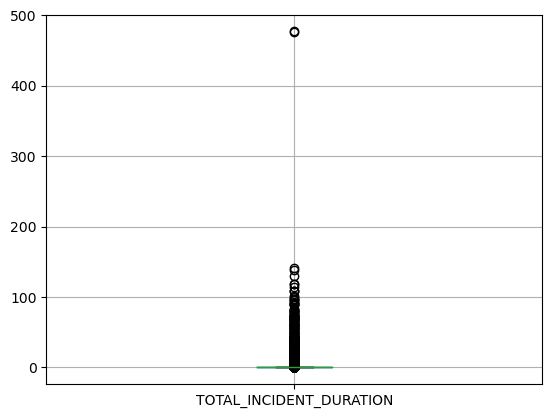

In [33]:
df.boxplot(column=['TOTAL_INCIDENT_DURATION'])

In [34]:
#Remove outlier
print(df[df.TOTAL_INCIDENT_DURATION == df.TOTAL_INCIDENT_DURATION.max()])
i= df[df.TOTAL_INCIDENT_DURATION == df.TOTAL_INCIDENT_DURATION.max()].index
df.drop(index=i, inplace=True)

        IM_INCIDENT_KEY  INCIDENT_DATE_TIME  UNITS_ONSCENE  \
3506161        67122302 2020-08-04 12:45:52              1   

         TOTAL_INCIDENT_DURATION ZIP_CODE  BOROUGH_DESC  \
3506161                    476.8    11233  4 - Brooklyn   

                   INCIDENT_CATEGORY  INCIDENT_CATNUM  LEVEL_CATEGORY  \
3506161  HAZARDOUS CONDITION-NO FIRE                4               1   

         BOROUGH_NUM Day_of_week  Hour_of_day  MONTH  DAY_NUM  
3506161            4     Tuesday           12      8      2.0  


In [35]:
print(df[df.TOTAL_INCIDENT_DURATION == df.TOTAL_INCIDENT_DURATION.max()])

        IM_INCIDENT_KEY  INCIDENT_DATE_TIME  UNITS_ONSCENE  \
3506221        67122637 2020-08-04 12:59:24              1   

         TOTAL_INCIDENT_DURATION ZIP_CODE  BOROUGH_DESC  \
3506221                   476.57    11237  4 - Brooklyn   

                   INCIDENT_CATEGORY  INCIDENT_CATNUM  LEVEL_CATEGORY  \
3506221  HAZARDOUS CONDITION-NO FIRE                4               1   

         BOROUGH_NUM Day_of_week  Hour_of_day  MONTH  DAY_NUM  
3506221            4     Tuesday           12      8      2.0  


In [44]:
i= df[df.TOTAL_INCIDENT_DURATION == df.TOTAL_INCIDENT_DURATION.max()].index
df.drop(index=i, inplace=True)
print(df[df.TOTAL_INCIDENT_DURATION == df.TOTAL_INCIDENT_DURATION.max()])

        IM_INCIDENT_KEY  INCIDENT_DATE_TIME  UNITS_ONSCENE  \
3318553        66409135 2020-02-18 16:46:14              2   

         TOTAL_INCIDENT_DURATION ZIP_CODE  BOROUGH_DESC  \
3318553                   140.48    11217  4 - Brooklyn   

              INCIDENT_CATEGORY  INCIDENT_CATNUM  LEVEL_CATEGORY  BOROUGH_NUM  \
3318553  FALSE ALARM FALSE CALL                7               1            4   

        Day_of_week  Hour_of_day  MONTH  DAY_NUM INCIDENT_LENGTH  \
3318553     Tuesday           16      2        2            3hr>   

        UNITS_CATEGORY  
3318553              2  


In [45]:
#Convert duration to category 
Durations = [(df['TOTAL_INCIDENT_DURATION'] <= .25),
             (df['TOTAL_INCIDENT_DURATION'] >.25) & (df['TOTAL_INCIDENT_DURATION'] <= .50),
             (df['TOTAL_INCIDENT_DURATION'] > .50) & (df['TOTAL_INCIDENT_DURATION'] <= .75),
             (df['TOTAL_INCIDENT_DURATION'] > .75) & (df['TOTAL_INCIDENT_DURATION'] <= 1.00),
             (df['TOTAL_INCIDENT_DURATION'] > 1.00) & (df['TOTAL_INCIDENT_DURATION'] <= 2.00),
             (df['TOTAL_INCIDENT_DURATION'] > 2.00) & (df['TOTAL_INCIDENT_DURATION'] <= 3.00),
             (df['TOTAL_INCIDENT_DURATION'] > 3.00)]

Duration_Categories = ['<=15min','15min-30min','30min-45min','45min-1hr','1-2hr','2-3hr','3hr>']

df['INCIDENT_LENGTH'] = np.select(Durations, Duration_Categories)

df['INCIDENT_LENGTH'].value_counts()

15min-30min    962832
<=15min        914961
30min-45min    226714
45min-1hr      115634
1-2hr          105312
2-3hr            9278
3hr>             5683
Name: INCIDENT_LENGTH, dtype: int64

In [46]:
#Review range of units on scene
df['UNITS_ONSCENE'].value_counts()

1      1442297
2       380113
3       195020
6       103379
5       101955
4        98041
7         8133
8         1771
12        1397
13        1192
11        1143
9         1006
14         924
10         883
15         683
16         407
17         269
18         232
19         202
20         162
21         128
26         103
22         100
24          97
23          83
25          83
27          57
28          53
30          42
29          40
31          39
32          31
33          29
34          29
37          25
38          22
36          21
35          19
40          16
41          12
43          12
39          12
48          10
63           9
42           9
45           8
50           7
44           7
49           7
51           6
53           6
61           6
55           6
67           4
57           4
70           4
68           4
58           4
46           3
66           3
47           3
52           3
56           3
60           3
90           3
54           3
93        

In [47]:
#Convert units on scene to category

Units = [(df['UNITS_ONSCENE'] == 1),
             (df['UNITS_ONSCENE'] == 2),
             (df['UNITS_ONSCENE'] == 3),
             (df['UNITS_ONSCENE'] == 4),
             (df['UNITS_ONSCENE'] == 5),
             (df['UNITS_ONSCENE'] == 6),
             (df['UNITS_ONSCENE'] >= 7)]

Unit_Categories = [1,2,3,4,5,6,7]

df['UNITS_CATEGORY'] = np.select(Units, Unit_Categories)

df['UNITS_CATEGORY'].value_counts()

1    1442297
2     380113
3     195020
6     103379
5     101955
4      98041
7      19609
Name: UNITS_CATEGORY, dtype: int64

In [48]:
#convert to object
df['UNITS_CATEGORY'] = df['UNITS_CATEGORY'].astype(str)

In [49]:
#Rename 7 value
df.loc[df['UNITS_CATEGORY'].str.startswith('7'), 'UNITS_CATEGORY'] = '7 or more'
df['UNITS_CATEGORY'].value_counts()

1            1442297
2             380113
3             195020
6             103379
5             101955
4              98041
7 or more      19609
Name: UNITS_CATEGORY, dtype: int64

In [50]:
#convert to integer
df['DAY_NUM'] = df['DAY_NUM'].astype(int)

In [51]:
#Check data verification before export
df.iloc[:1600000].info(verbose=True)
df.iloc[1600000:2348969].info(verbose=True)
df.describe()
df.head(n=10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 2556 to 3413986
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   IM_INCIDENT_KEY          1600000 non-null  object        
 1   INCIDENT_DATE_TIME       1600000 non-null  datetime64[ns]
 2   UNITS_ONSCENE            1600000 non-null  int32         
 3   TOTAL_INCIDENT_DURATION  1600000 non-null  float64       
 4   ZIP_CODE                 1600000 non-null  object        
 5   BOROUGH_DESC             1600000 non-null  object        
 6   INCIDENT_CATEGORY        1600000 non-null  object        
 7   INCIDENT_CATNUM          1600000 non-null  int32         
 8   LEVEL_CATEGORY           1600000 non-null  int32         
 9   BOROUGH_NUM              1600000 non-null  int32         
 10  Day_of_week              1600000 non-null  object        
 11  Hour_of_day              1600000 non-null  int64         
 1

,IM_INCIDENT_KEY,INCIDENT_DATE_TIME,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,ZIP_CODE,BOROUGH_DESC,INCIDENT_CATEGORY,INCIDENT_CATNUM,LEVEL_CATEGORY,BOROUGH_NUM,Day_of_week,Hour_of_day,MONTH,DAY_NUM,INCIDENT_LENGTH,UNITS_CATEGORY
2556,63583742,2018-07-21 12:18:19,1,0.66,10475,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,12,7,6,30min-45min,1
3281,63583743,2018-07-21 12:18:26,1,0.12,11230,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,12,7,6,<=15min,1
3335,63584267,2018-07-21 14:16:40,2,0.02,11204,4 - Brooklyn,HAZARDOUS CONDITION-NO FIRE,4,1,4,Saturday,14,7,6,<=15min,2
3390,63584484,2018-07-21 15:07:51,1,0.37,11235,4 - Brooklyn,SERVICE CALL,5,1,4,Saturday,15,7,6,15min-30min,1
3607,63584485,2018-07-21 15:08:36,1,0.32,11208,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,15,7,6,15min-30min,1
3904,63584710,2018-07-21 16:03:49,1,0.44,11693,5 - Queens,SERVICE CALL,5,1,5,Saturday,16,7,6,15min-30min,1
4337,63584716,2018-07-21 16:06:01,1,1.77,10464,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,16,7,6,1-2hr,1
5867,63584720,2018-07-21 16:05:50,1,0.19,10451,2 - Bronx,SERVICE CALL,5,1,2,Saturday,16,7,6,<=15min,1
6290,63584722,2018-07-21 16:06:40,1,0.39,10468,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,16,7,6,15min-30min,1
6317,63584727,2018-07-21 16:08:38,1,0.26,11357,5 - Queens,RESCUE & EMS,3,1,5,Saturday,16,7,6,15min-30min,1


In [52]:
#Export clean datset for use 
df.to_csv('fdip_clean.csv', index=False)